In [1]:
from pathlib import Path

# Automatically get the base path of your project
base_path = Path.cwd().parents[0]  # adjust .parents[0] if needed
print("Base path of the project:", base_path)

Base path of the project: c:\Users\Yusuf\OneDrive\LST\Derde_jaar\Y3Q4\Metaproteomics_with_db


In [2]:
# This code is more robust and will work regardless of the current working directory.
# Make sure that base_path is defined correctly.
# Install the requirements from the requirements.txt file
#!pip3 install -r "{base_path}/requirements.txt"

## Load Input Data for Community Composition Analysis

This section loads all relevant input files needed to compare microbial community compositions derived from multiple taxonomic pipelines.

We consider the following sources:
- **Pept2LCA-based composition**: taxonomic assignment based on least common ancestor from de novo peptides.
- **DIAMOND-based alignment results**: peptides matched to proteins using a custom reference database.
- **Metagenomics-derived taxa**: taxonomic annotations based on matching raw or predicted proteins against metagenomic data.

Each dataset is loaded into a separate pandas `DataFrame`. These data structures will be used in downstream visualizations of:
- Genus-level composition (e.g., for overview trends)
- Species-level composition (for finer resolution)
- Absolute vs. relative counts
This step ensures we have access to all necessary input tables before aggregation and plotting.


In [ ]:
import pandas as pd
from pathlib import Path

# === Step 1: Define the community comparison folder path ===
# base_path should already be defined earlier in the notebook
community_dir = base_path / "Community_comparisons"

# === Step 2: Set paths to all relevant input CSV files ===
# These files contain microbial composition data derived from different tools/pipelines
file_pept2lca = community_dir / "genus_composition_pept2lca.csv"          # Pre-aggregated genus-level from Pept2LCA
file_pept2lca_genus = community_dir / "genus_composition_psm.csv"         # Pept2LCA matches at genus level (per PSM)
file_pept2lca_species = community_dir / "species_composition_pept2lca.csv" # Pept2LCA matches at species level (aggregated)
file_diamond = community_dir / "diamond_df_rank_annotated_fixed.csv"      # DIAMOND results with annotated taxonomy ranks
file_meta_psm = community_dir / "metagenomics_psm_taxa_annotated.csv"     # Metagenomics-derived matches from PSMs
file_meta_raw = community_dir / "metagenomics_rawdb_taxa_annotated.csv"   # Metagenomics-derived taxa from raw reference DB

# === Step 3: Load all files into pandas DataFrames ===
df_pept2lca = pd.read_csv(file_pept2lca)
df_pept2lca_genus = pd.read_csv(file_pept2lca_genus)
df_pept2lca_species = pd.read_csv(file_pept2lca_species)
df_diamond = pd.read_csv(file_diamond)
df_meta_psm = pd.read_csv(file_meta_psm)
df_meta_raw = pd.read_csv(file_meta_raw)

# === Step 4: Preview loaded data for quality check ===
# This helps ensure all files were loaded correctly and contain expected structure
print("Pept2LCA Composition:")
display(df_pept2lca.head())

print("Pept2LCA Genus Analysis:")
display(df_pept2lca_genus.head())

print("Pept2LCA Species Analysis:")
display(df_pept2lca_species.head())

print("Diamond Rank Annotated:")
display(df_diamond.head())

print("Metagenomics PSM Annotated:")
display(df_meta_psm.head())

print("Metagenomics Raw DB Annotated:")
display(df_meta_raw.head())

Pept2LCA Composition:


,Genus,Count,Relative Abundance (%)
0,Unclassified,707,70.278330
1,Candidatus Accumulibacter,153,15.208748
2,Nitrospira,46,4.572565
3,Candidatus Competibacter,35,3.479125
4,Nitrosomonas,31,3.081511


Pept2LCA Genus Analysis:


,Peptide,Accession,Taxon names,Taxon IDs,lca,lca rank
0,LGEHNIDVLEGNEQFINAAK,NaN,NaN,NaN,NaN,NaN
1,LGEHNIDVLEGNEQFINAAK,NaN,NaN,NaN,NaN,NaN
2,LGEHNIDVLEGNEQFINAAK,NaN,NaN,NaN,NaN,NaN
3,KVQAAQYVASHPGEVC(+57.02)PAK,A0A011PKS5|A0A011PKS5_9PROT:A0A935PZZ1|A0A935P...,"Candidatus Accumulibacter appositus, Candidatu...","1454003, 2954385, 327160, 2954383",Candidatus Accumulibacter,genus
4,KVQAAQYVASHPGEVC(+57.02)PAK,A0A011PKS5|A0A011PKS5_9PROT:A0A935PZZ1|A0A935P...,"Candidatus Accumulibacter appositus, Candidatu...","1454003, 2954385, 327160, 2954383",Candidatus Accumulibacter,genus


Pept2LCA Species Analysis:


,Species,Count,Relative Abundance (%)
0,Unclassified,851,84.592445
1,Candidatus Accumulibacter phosphatis,53,5.268390
2,Candidatus Competibacter denitrificans,35,3.479125
3,Nitrospira defluvii,26,2.584493
4,Nitrosomonas oligotropha,18,1.789264


Diamond Rank Annotated:


,qseqid,sseqid,pident,bitscore,qseq,sseq,accession,organism,taxonomy_rank
0,peptide_2,UniRef100_A0A011QQ48,100.0,24.8,MAGSQTAMTR,MAGSQTAMTR,A0A011QQ48,Candidatus Accumulibacter appositus,species
1,peptide_2,UniRef100_A0A6A7RXA6,100.0,24.8,MAGSQTAMTR,MAGSQTAMTR,A0A6A7RXA6,Candidatus Accumulibacter phosphatis,species
2,peptide_2,UniRef100_A0A369XS58,100.0,24.8,MAGSQTAMTR,MAGSQTAMTR,A0A369XS58,Candidatus Accumulibacter phosphatis,species
3,peptide_4,UniRef100_A0A369XW92,94.4,42.0,WDNAATYTSPNWSGFTAK,WNNAATYTSPNWSGFTAK,A0A369XW92,Candidatus Accumulibacter phosphatis,species
4,peptide_4,UniRef100_A0A011RCA4,94.4,42.0,WDNAATYTSPNWSGFTAK,WNNAATYTSPNWSGFTAK,A0A011RCA4,Accumulibacter regalis,not_found


Metagenomics PSM Annotated:


,Peptide,-10lgP,Mass,Length,ppm,m/z,Z,RT,Area,Fraction,...,Scan,from Chimera,Source File,Accession,PTM,AScore,Found By,lca_taxid,taxon_name,taxon_rank
0,TPTTDGTQNDSAYDFSAAVHSAR,148.86,2411.0625,23,-1.2,804.6938,3,99.95,110500000.0,1,...,32903,No,MP_RZ07032023_GW_flat_180min_DDA02.raw,NODE_514_length_56624_cov_10.429334_2,NaN,NaN,PEAKS DB,1898103,Rhodocyclaceae bacterium,species
1,TPTTDGTQNDSAYDFSAAVHSAR,141.51,2411.0625,23,-1.2,804.6938,3,99.95,110500000.0,1,...,33198,No,MP_RZ07032023_GW_flat_180min_DDA02.raw,NODE_514_length_56624_cov_10.429334_2,NaN,NaN,PEAKS DB,1898103,Rhodocyclaceae bacterium,species
2,TPTTDGTQNDSAYDFSAAVHSAR,121.60,2411.0625,23,-1.2,804.6938,3,99.95,110500000.0,1,...,33478,No,MP_RZ07032023_GW_flat_180min_DDA02.raw,NODE_514_length_56624_cov_10.429334_2,NaN,NaN,PEAKS DB,1898103,Rhodocyclaceae bacterium,species
3,TPTTDGTQNDSAYDFSAAVHSAR,120.23,2411.0625,23,1.5,1206.5403,2,99.92,1075000.0,1,...,32757,No,MP_RZ07032023_GW_flat_180min_DDA02.raw,NODE_514_length_56624_cov_10.429334_2,NaN,NaN,PEAKS DB,1898103,Rhodocyclaceae bacterium,species
4,TPTTDGTQNDSAYDFSAAVHSAR,120.16,2411.0625,23,-0.1,804.6947,3,102.14,0.0,1,...,33762,No,MP_RZ07032023_GW_flat_180min_DDA02.raw,NODE_514_length_56624_cov_10.429334_2,NaN,NaN,PEAKS DB,1898103,Rhodocyclaceae bacterium,species


Metagenomics Raw DB Annotated:


,protein_id,lca_taxid,score,taxon_name,rank
0,NODE_1_length_1846635_cov_14.991676_1,2035772,99.4,Candidatus Omnitrophota bacterium,species
1,NODE_1_length_1846635_cov_14.991676_2,2026735,159.0,Deltaproteobacteria bacterium,species
2,NODE_1_length_1846635_cov_14.991676_3,2,318.0,Bacteria,domain
3,NODE_1_length_1846635_cov_14.991676_4,29,335.0,Myxococcales,order
4,NODE_1_length_1846635_cov_14.991676_5,2026735,260.0,Deltaproteobacteria bacterium,species


## Genus-Level Microbial Composition Plot (Relative Abundance)

This section generates a **stacked bar chart** showing the **relative abundance of microbial genera** across different datasets.

We compare the output from multiple pipelines:
- `Pept2LCA`: Pre-computed genus-level composition from de novo peptide LCA mapping.
- `Genus db (PSM)`: Taxonomic assignment using a genus-filtered custom database.
- `Metagenomics PSM`: Matches from a protein-spectrum match (PSM) search against metagenomic proteins.
- `Metagenomics RawDB`: Matches against raw metagenomic database entries.

To keep the plot interpretable:
- Only the top `N` most abundant genera are shown explicitly.
- Less abundant genera can be grouped into an `'Other'` category (if `collapse_other=True`).
- Relative abundances are calculated per dataset to normalize for differences in total peptide counts.

This visualization provides a quick comparison of taxonomic resolution and bias introduced by each method.


<Figure size 1400x600 with 0 Axes>

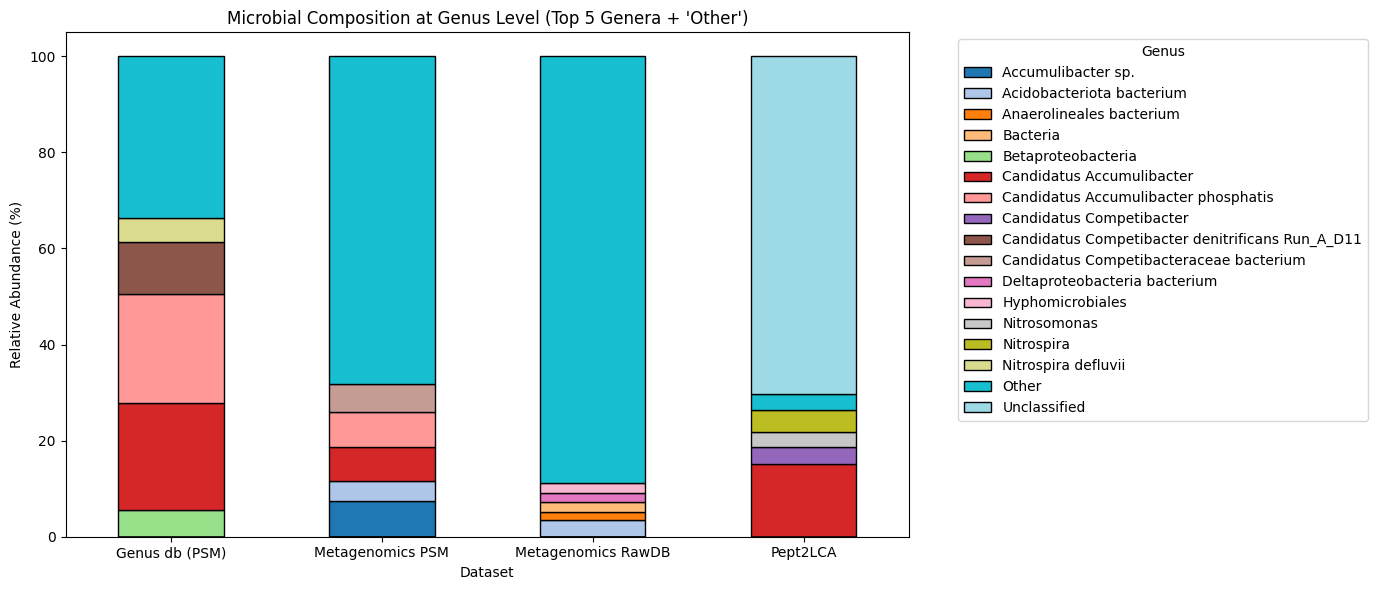

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# === Settings ===
TOP_N = 5                     # Number of top genera to display in the plot
collapse_other = True         # If True, group all non-top-N genera into 'Other' for clarity

# === Input directory ===
community_dir = base_path / "Community_comparisons"

# === Step 1: Load genus-level composition data from all four pipelines ===
df_pept2lca = pd.read_csv(community_dir / "genus_composition_pept2lca.csv")  # Pre-aggregated Pept2LCA composition
df_pept2lca_genus = pd.read_csv(community_dir / "genus_composition_psm.csv") # Raw genus per PSM (Pept2LCA db search)
df_meta_psm = pd.read_csv(community_dir / "metagenomics_psm_taxa_annotated.csv") # Annotated metagenomic PSMs
df_meta_raw = pd.read_csv(community_dir / "metagenomics_rawdb_taxa_annotated.csv") # Annotated hits from metagenomic raw proteins

# === Step 2: Generalized function to compute relative abundances from genus column ===
def compute_abundance(df, genus_col, label, top_n=TOP_N, collapse_other=True):
    df = df.copy()
    df = df[[genus_col]].dropna()
    df.columns = ["Genus"]
    df["Genus"] = df["Genus"].replace({"root": "Unclassified"})  # Normalize naming

    # Count PSMs per genus and calculate relative abundance
    genus_counts = df["Genus"].value_counts().reset_index()
    genus_counts.columns = ["Genus", "Count"]
    genus_counts["Abundance"] = genus_counts["Count"] / genus_counts["Count"].sum() * 100

    if collapse_other:
        # Keep only top-N genera, group others as 'Other'
        top_genera = genus_counts.nlargest(top_n, "Abundance")["Genus"]
        genus_counts["Genus"] = genus_counts["Genus"].apply(lambda x: x if x in top_genera.values else "Other")
        genus_final = genus_counts.groupby("Genus", as_index=False)["Abundance"].sum()
    else:
        # Keep only the top-N genera, renormalize to 100%
        genus_final = genus_counts.nlargest(top_n, "Abundance")[["Genus", "Abundance"]].copy()
        genus_final["Abundance"] = genus_final["Abundance"] / genus_final["Abundance"].sum() * 100

    genus_final["Dataset"] = label  # Label for barplot group
    return genus_final

# === Step 3: Process Pept2LCA (already includes relative abundance) ===
data_pept2lca = df_pept2lca[["Genus", "Relative Abundance (%)"]].copy()
data_pept2lca.columns = ["Genus", "Abundance"]
data_pept2lca["Genus"] = data_pept2lca["Genus"].replace({"root": "Unclassified"})

# Optionally collapse non-top genera
if collapse_other:
    top_genera = data_pept2lca.nlargest(TOP_N, "Abundance")["Genus"]
    data_pept2lca["Genus"] = data_pept2lca["Genus"].apply(lambda x: x if x in top_genera.values else "Other")
    data_pept2lca = data_pept2lca.groupby("Genus", as_index=False)["Abundance"].sum()
else:
    data_pept2lca = data_pept2lca.nlargest(TOP_N, "Abundance").copy()
    data_pept2lca["Abundance"] = data_pept2lca["Abundance"] / data_pept2lca["Abundance"].sum() * 100

data_pept2lca["Dataset"] = "Pept2LCA"

# === Step 4: Process remaining datasets using the helper function ===
data_pept2lca_genus = compute_abundance(df_pept2lca_genus, genus_col="lca", label="Genus db (PSM)", collapse_other=collapse_other)
data_meta_psm = compute_abundance(df_meta_psm, genus_col="taxon_name", label="Metagenomics PSM", collapse_other=collapse_other)
data_meta_raw = compute_abundance(df_meta_raw, genus_col="taxon_name", label="Metagenomics RawDB", collapse_other=collapse_other)

# === Step 5: Combine all processed results into a single DataFrame ===
plot_data = pd.concat([data_pept2lca, data_pept2lca_genus, data_meta_psm, data_meta_raw], ignore_index=True)

# === Step 6: Reshape data for plotting (pivot to wide format) ===
pivot = plot_data.pivot_table(index="Dataset", columns="Genus", values="Abundance", fill_value=0)

# === Step 7: Plotting ===
plt.figure(figsize=(14, 6))
pivot.plot(kind='bar', stacked=True, colormap='tab20', edgecolor='black', figsize=(14, 6))

plt.ylabel("Relative Abundance (%)")
title_scope = f"Top {TOP_N} Genera" + (" + 'Other'" if collapse_other else "")
plt.title(f"Microbial Composition at Genus Level ({title_scope})")
plt.xticks(rotation=0)
plt.legend(title="Genus", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


## Interpretation of Genus-Level Microbial Community Composition

### Summary of the Stacked Bar Chart
- This plot compares **genus-level microbial communities** derived from four datasets:
  1. **Pept2LCA** – Taxonomic assignment of de novo peptides using LCA.
  2. **Genus db (PSM)** – PEAKS search of the Pept2LCA genus-filtered database against raw spectra, followed by LCA on matched PSMs.
  3. **Metagenomics PSM** – PSMs matched against the full metagenomics-derived database and assigned taxonomy.
  4. **Metagenomics RawDB** – Reference taxonomy based on all proteins in the metagenomics database.

- Relative abundances are normalized within each dataset. The top *n* genera are shown; the remainder are grouped under `"Other"` if enabled.

---

### Insights & Interpretation

#### Goal:
To assess how closely **Pept2LCA-based communities (1 & 2)** approximate the **metagenomics-derived reference community (3 & 4)** — evaluating both **coverage** and **false discovery rate (FDR)**.

#### Key Observations:
- **Metagenomics RawDB** shows the richest genus diversity, as expected from a complete DNA-derived proteome.
- **Genus db (PSM)** shows strong agreement with **Metagenomics PSM**, suggesting the Pept2LCA-derived database captures relevant taxa well.
- **Pept2LCA (LCA)** detects fewer genera and more unclassified hits due to strict ALC thresholds and the limits of de novo resolution.

#### Interpretation Summary:

| Metric                  | Pept2LCA (LCA) | Genus db (PSM) | Metagenomics PSM |
|-------------------------|----------------|----------------|-------------------|
| Genus Coverage          | Low            | Moderate–High  | High              |
| Agreement with Reference| Partial        | Strong         | — (reference)     |
| False Positives Risk    | Low            | Moderate       | Low               |

- **Pept2LCA (LCA)** offers high confidence but lower resolution.
- **Genus db (PSM)** improves coverage while still aligning with the metagenomic profile, indicating **reasonable FDR and good utility**.
- Combining both **de novo** and **reference-based** strategies offers a balanced approach to reliable and broad metaproteomic analysis.


## Genus-Level Microbial Composition Plot (Absolute PSM/Peptide Counts)

In this section, we visualize the **absolute number of matched PSMs or peptides** assigned to different microbial genera across multiple identification strategies:

- `Pept2LCA`: Genus assignments from de novo peptides using least common ancestor (LCA) via UniPept.
- `Genus db (PSM)`: Identifications using a genus-filtered custom protein database.
- `Metagenomics PSM`: Matches against metagenomic proteins (PSM-based annotation).
- `Metagenomics RawDB`: Matches against all proteins from a metagenomic raw reference.

**Purpose**:
- Unlike relative abundance plots, this view highlights the **absolute identification yield** from each method.
- Helps determine which pipelines return more identifications per taxonomic group.
- Useful for assessing sensitivity, database coverage, or bias introduced by filtering.

**Configurable options**:
- `TOP_N`: Limits the number of most abundant genera to visualize (rest grouped or discarded).
- `collapse_other`: If `True`, genera outside the top-N are grouped into `"Other"`.
- `included`: Select which datasets to include in the comparison.


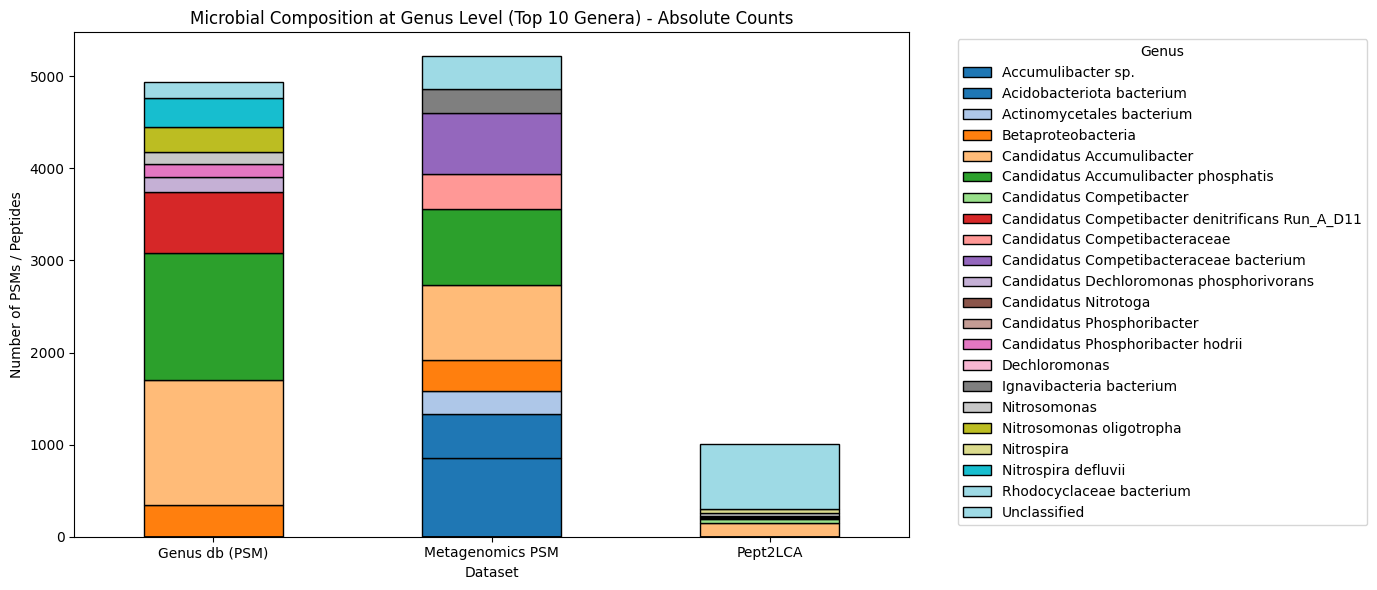

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# === Settings ===
TOP_N = 10                   # Show only the top 10 most abundant genera
collapse_other = False       # If True: collapse non-top genera into 'Other', else exclude them

# === Choose which datasets to include in the plot ===
included = ["Pept2LCA", "Genus db (PSM)", "Metagenomics PSM"]  # You can add/remove datasets here

# === Define path to community composition files ===
community_dir = base_path / "Community_comparisons"

# === Step 1: Load genus-level count data from each source ===
df_pept2lca = pd.read_csv(community_dir / "genus_composition_pept2lca.csv")     # Pept2LCA LCA summary
df_pept2lca_genus = pd.read_csv(community_dir / "genus_composition_psm.csv")    # PSM genus LCA (from db search)
df_meta_psm = pd.read_csv(community_dir / "metagenomics_psm_taxa_annotated.csv") # PSM hits to metagenomics
df_meta_raw = pd.read_csv(community_dir / "metagenomics_rawdb_taxa_annotated.csv") # All metagenomic hits

# === Step 2: Define function to compute genus counts and optionally collapse less abundant genera ===
def compute_counts(df, genus_col, label, top_n=TOP_N, collapse_other=True):
    df = df[[genus_col]].dropna().copy()
    df.columns = ["Genus"]
    df["Genus"] = df["Genus"].replace({"root": "Unclassified"})  # Clean missing labels

    # Count number of observations per genus
    counts = df["Genus"].value_counts().reset_index()
    counts.columns = ["Genus", "Count"]

    if collapse_other:
        # Group all genera outside the top-N into 'Other'
        top_genera = counts.nlargest(top_n, "Count")["Genus"]
        counts["Genus"] = counts["Genus"].apply(lambda x: x if x in top_genera.values else "Other")
        counts = counts.groupby("Genus", as_index=False)["Count"].sum()
    else:
        # Keep only top-N genera
        counts = counts.nlargest(top_n, "Count")

    counts["Dataset"] = label
    return counts

# === Step 3: Process Pept2LCA (pre-aggregated count table) ===
data_pept2lca = df_pept2lca[["Genus", "Count"]].copy()
data_pept2lca["Genus"] = data_pept2lca["Genus"].replace({"root": "Unclassified"})

# Collapse 'Other' if enabled
if collapse_other:
    top_genera = data_pept2lca.nlargest(TOP_N, "Count")["Genus"]
    data_pept2lca["Genus"] = data_pept2lca["Genus"].apply(lambda x: x if x in top_genera.values else "Other")
    data_pept2lca = data_pept2lca.groupby("Genus", as_index=False)["Count"].sum()
else:
    data_pept2lca = data_pept2lca[data_pept2lca["Genus"].isin(
        data_pept2lca.nlargest(TOP_N, "Count")["Genus"]
    )]

data_pept2lca["Dataset"] = "Pept2LCA"

# === Step 4: Process the other datasets using the unified function ===
data_pept2lca_genus = compute_counts(df_pept2lca_genus, "lca", "Genus db (PSM)", collapse_other=collapse_other)
data_meta_psm = compute_counts(df_meta_psm, "taxon_name", "Metagenomics PSM", collapse_other=collapse_other)
data_meta_raw = compute_counts(df_meta_raw, "taxon_name", "Metagenomics RawDB", collapse_other=collapse_other)

# === Step 5: Store all datasets in a dictionary for easy lookup ===
dataset_map = {
    "Pept2LCA": data_pept2lca,
    "Genus db (PSM)": data_pept2lca_genus,
    "Metagenomics PSM": data_meta_psm,
    "Metagenomics RawDB": data_meta_raw
}

# === Step 6: Combine only selected datasets ===
plot_data = pd.concat([dataset_map[key] for key in included], ignore_index=True)

# === Step 7: Reshape to wide format for bar plotting ===
pivot = plot_data.pivot_table(index="Dataset", columns="Genus", values="Count", fill_value=0)

# === Step 8: Create stacked bar plot (absolute counts) ===
pivot.plot(kind='bar', stacked=True, figsize=(14, 6), colormap='tab20', edgecolor='black')
plt.ylabel("Number of PSMs / Peptides")
title_scope = f"Top {TOP_N} Genera" + (" + 'Other'" if collapse_other else "")
plt.title(f"Microbial Composition at Genus Level ({title_scope}) - Absolute Counts")
plt.xticks(rotation=0)
plt.legend(title="Genus", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


## Interpretation of Genus-Level Microbial Community Composition

### Summary of the Stacked Bar Charts

- The charts compare **genus-level microbial compositions** across four datasets:
  1. **Pept2LCA**: De novo peptide sequences matched taxonomically via LCA.
  2. **Genus db (PSM)**: Raw spectra matched to the genus-level Pept2LCA database; LCA applied to those hits.
  3. **Metagenomics PSM**: PSMs assigned taxonomy via a metagenomics-derived protein database.
  4. **Metagenomics RawDB**: Ideal DNA-based reference protein database without spectrum-level filtering.

- **Relative abundance**: Shows normalized genus contribution per dataset (top *n* genera + optional "Other").
- **Absolute counts**: Reflect the total number of PSMs/peptides per genus.

---

### Insights & Interpretation

#### Taxonomic Coverage

- **Metagenomics RawDB** shows the highest taxonomic diversity and count, as expected from a complete DNA-based reference.
- **Pept2LCA** shows fewer matches and genera, likely due to:
  - De novo limitations or strict filtering (e.g., ALC).
  - Lower sequence recovery or novelty in custom database.
- **Genus db (PSM)** provides broader coverage than direct Pept2LCA, indicating that **spectrum-level validation adds depth and reduces FDR**.

#### Comparison & Representativeness

- **Genus db (PSM)** aligns more closely with **Metagenomics PSM**, recovering major genera effectively.
- This suggests that the custom Pept2LCA database—when validated via spectrum matching—captures a **representative subset** of the microbial community.
- Direct **Pept2LCA** (de novo only) underestimates diversity, highlighting its **limited taxonomic resolution**.

---

### Conclusion

- **Colleting proteomes from lca's matching with the de novo peptides** yields a reasonable confidence and coverage.
- Comparing against the metagenomics reference allows you to assess **representativeness and database completeness**.
- Absolute and relative views together help evaluate **both coverage and FDR** in custom protein databases.


## Species-Level Microbial Composition (Relative Abundance)

This section creates a **stacked bar plot** showing the **relative abundance (%)** of identified species across four different data sources:

- `DIAMOND`: Protein annotations from DIAMOND alignments with species-level taxonomic rank.
- `Pept2LCA`: Taxonomic assignments of de novo peptides using UniPept's LCA (species-level fallback).
- `Metagenomics PSM`: PSM-based species assignments matched to a metagenomic reference.
- `Metagenomics RawDB`: Matches against the raw metagenomic database, unfiltered.

### Why we do this:
This figure allows us to:
- Visualize **taxonomic composition at the species level**.
- Compare how different databases and pipelines affect biological interpretation.
- Evaluate whether certain pipelines lead to biased or incomplete species profiles.

### Configuration:
- `TOP_N`: Number of most abundant species shown explicitly.
- `collapse_other`: Toggle to include remaining species in an `"Other"` group.
- `include_unclassified`: If `True`, also include hits labeled `"Unclassified"` or `"root"`.


<Figure size 1400x600 with 0 Axes>

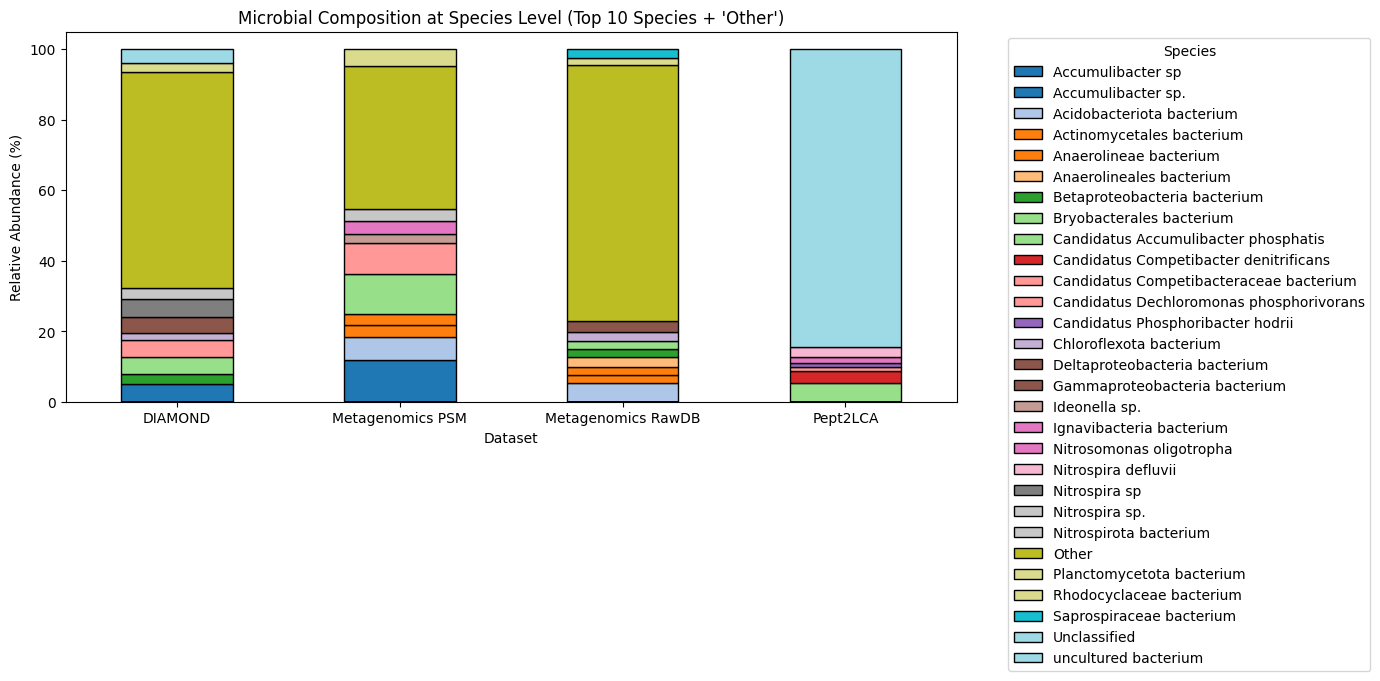

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# === Settings ===
TOP_N = 10                      # Number of top species to visualize
collapse_other = True          # Collapse remaining species into 'Other' if True
include_unclassified = True    # Whether to include species like 'Unclassified' or 'root'

# === Define paths ===
community_dir = base_path / "Community_comparisons"
file_diamond = community_dir / "diamond_df_rank_annotated_fixed.csv"
file_pept2lca_species = community_dir / "species_composition_pept2lca.csv"
file_meta_psm = community_dir / "metagenomics_psm_taxa_annotated.csv"
file_meta_raw = community_dir / "metagenomics_rawdb_taxa_annotated.csv"

# === Load dataframes ===
df_diamond = pd.read_csv(file_diamond)
df_pept2lca = pd.read_csv(file_pept2lca_species)
df_meta_psm = pd.read_csv(file_meta_psm)
df_meta_raw = pd.read_csv(file_meta_raw)

# === Generalized function for computing relative species abundance ===
def compute_species_abundance(df, col, dataset_label, top_n=TOP_N, collapse_other=True, allow_unclassified=True):
    df = df.copy()
    df = df[[col]].dropna()
    df.columns = ["Species"]  # Standardize column name

    if not allow_unclassified:
        # Remove unwanted entries
        df = df[~df["Species"].isin(["Unclassified", "root", "unknown", "not_found"])]

    # Count species occurrences
    species_counts = df["Species"].value_counts().reset_index()
    species_counts.columns = ["Species", "Count"]
    species_counts["Abundance"] = species_counts["Count"] / species_counts["Count"].sum() * 100

    if collapse_other:
        # Collapse all non-top species into 'Other'
        top_species = species_counts.nlargest(top_n, "Abundance")["Species"]
        species_counts["Species"] = species_counts["Species"].apply(lambda x: x if x in top_species.values else "Other")
        species_final = species_counts.groupby("Species", as_index=False)["Abundance"].sum()
    else:
        # Only retain top-N and normalize again to 100%
        species_final = species_counts.nlargest(top_n, "Abundance")[["Species", "Abundance"]]
        species_final["Abundance"] = species_final["Abundance"] / species_final["Abundance"].sum() * 100

    species_final["Dataset"] = dataset_label
    return species_final

# === Process DIAMOND results: filter species-rank hits only ===
df_diamond_species = compute_species_abundance(
    df_diamond[df_diamond["taxonomy_rank"] == "species"],  # Only keep species-level identifications
    col="organism",
    dataset_label="DIAMOND",
    collapse_other=collapse_other,
    allow_unclassified=False  # Don't allow root/unknowns
)

# === Process Pept2LCA results: already aggregated species table ===
df_pept2lca = df_pept2lca.rename(columns={"Relative Abundance (%)": "Abundance"})
if not include_unclassified:
    df_pept2lca = df_pept2lca[~df_pept2lca["Species"].isin(["Unclassified"])]

if collapse_other:
    top_species = df_pept2lca.nlargest(TOP_N, "Abundance")["Species"]
    df_pept2lca["Species"] = df_pept2lca["Species"].apply(lambda x: x if x in top_species.values else "Other")
    df_pept2lca = df_pept2lca.groupby("Species", as_index=False)["Abundance"].sum()
else:
    df_pept2lca = df_pept2lca.nlargest(TOP_N, "Abundance")
    df_pept2lca["Abundance"] = df_pept2lca["Abundance"] / df_pept2lca["Abundance"].sum() * 100

df_pept2lca["Dataset"] = "Pept2LCA"

# === Process Metagenomics (PSM) data ===
data_meta_psm = compute_species_abundance(
    df_meta_psm[df_meta_psm["taxon_rank"] == "species"],
    col="taxon_name",
    dataset_label="Metagenomics PSM",
    collapse_other=collapse_other,
    allow_unclassified=include_unclassified
)

# === Process Metagenomics RawDB data ===
data_meta_raw = compute_species_abundance(
    df_meta_raw[df_meta_raw["rank"] == "species"],
    col="taxon_name",
    dataset_label="Metagenomics RawDB",
    collapse_other=collapse_other,
    allow_unclassified=include_unclassified
)

# === Combine all datasets into one dataframe ===
plot_df = pd.concat([df_diamond_species, data_meta_psm, data_meta_raw, df_pept2lca], ignore_index=True)

# === Pivot dataframe for stacked bar plot ===
pivot_df = plot_df.pivot_table(index="Dataset", columns="Species", values="Abundance", fill_value=0)

# === Generate stacked bar chart ===
plt.figure(figsize=(14, 6))
pivot_df.plot(kind="bar", stacked=True, colormap="tab20", edgecolor="black", figsize=(14, 6))

plt.ylabel("Relative Abundance (%)")
plt.title(f"Microbial Composition at Species Level (Top {TOP_N} Species + 'Other')")
plt.xticks(rotation=0)
plt.legend(title="Species", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


## Microbial Composition at Species Level (Absolute Counts)

This code visualizes the **absolute number of peptide-spectrum matches (PSMs)** or peptide-level assignments per species, across multiple taxonomic annotation pipelines:

- `Pept2LCA`: LCA-based species annotations derived from de novo peptides using UniPept.
- `DIAMOND`: Species annotations from DIAMOND alignment results.
- `Metagenomics PSM`: PSMs annotated against a species-level metagenomic reference.
- `Metagenomics RawDB`: Raw protein database annotations from a metagenomic source.

### Why this plot?
- It gives insight into how **many peptide/PSM hits** are assigned to each species.
- Useful to compare **quantitative representation** across tools.
- Helps detect overrepresented or underrepresented taxa based on the raw input data.

### Parameters
- `TOP_N`: How many of the top species to label individually.
- `collapse_other`: If `True`, species outside the top-N are grouped into `'Other'`.
- `included`: Lets you choose which datasets to include in the bar plot.


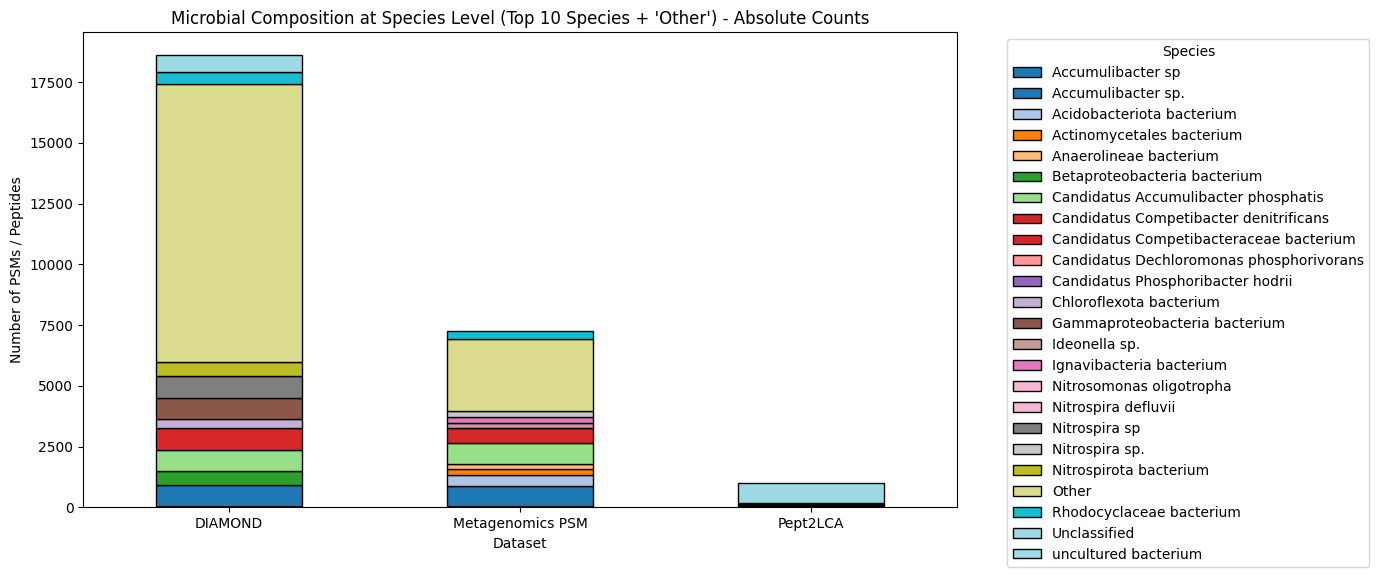

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# === Settings ===
TOP_N = 10                      # Show top-N most frequent species
collapse_other = True           # Collapse remaining species into 'Other'

# Select which datasets to include in the plot
included = ["Pept2LCA", "DIAMOND", "Metagenomics PSM"]  # Options include also "Metagenomics RawDB"

# Define directory containing all community composition files
community_dir = base_path / "Community_comparisons"

# === Load source data from CSV files ===
df_pept2lca = pd.read_csv(community_dir / "species_composition_pept2lca.csv")               # Pept2LCA species counts
df_diamond = pd.read_csv(community_dir / "diamond_df_rank_annotated_fixed.csv")            # DIAMOND matches with taxonomic info
df_meta_psm = pd.read_csv(community_dir / "metagenomics_psm_taxa_annotated.csv")           # PSMs matched against metagenomics db
df_meta_raw = pd.read_csv(community_dir / "metagenomics_rawdb_taxa_annotated.csv")         # Unfiltered matches from raw db

# === Function to count species and optionally group minor ones into 'Other' ===
def compute_counts(df, species_col, label, top_n=TOP_N, collapse_other=True):
    df = df[[species_col]].dropna().copy()
    df.columns = ["Species"]
    df["Species"] = df["Species"].replace({"root": "Unclassified"})

    # Count occurrences of each species
    counts = df["Species"].value_counts().reset_index()
    counts.columns = ["Species", "Count"]

    if collapse_other:
        # Collapse non-top species into 'Other'
        top_species = counts.nlargest(top_n, "Count")["Species"]
        counts["Species"] = counts["Species"].apply(lambda x: x if x in top_species.values else "Other")
        counts = counts.groupby("Species", as_index=False)["Count"].sum()
    else:
        # Only keep top-N species
        counts = counts.nlargest(top_n, "Count")

    counts["Dataset"] = label
    return counts

# === Process Pept2LCA species counts ===
data_pept2lca = df_pept2lca[["Species", "Count"]].copy()
data_pept2lca["Species"] = data_pept2lca["Species"].replace({"root": "Unclassified"})

if collapse_other:
    # Collapse non-top species
    top_species = data_pept2lca.nlargest(TOP_N, "Count")["Species"]
    data_pept2lca["Species"] = data_pept2lca["Species"].apply(lambda x: x if x in top_species.values else "Other")
    data_pept2lca = data_pept2lca.groupby("Species", as_index=False)["Count"].sum()
else:
    # Keep only top-N
    data_pept2lca = data_pept2lca[data_pept2lca["Species"].isin(
        data_pept2lca.nlargest(TOP_N, "Count")["Species"]
    )]
data_pept2lca["Dataset"] = "Pept2LCA"

# === Process DIAMOND species counts (filtered by taxonomy_rank) ===
df_diamond_species = df_diamond[df_diamond["taxonomy_rank"] == "species"]
data_diamond = compute_counts(df_diamond_species, "organism", "DIAMOND", collapse_other=collapse_other)

# === Process metagenomics results ===
data_meta_psm = compute_counts(
    df_meta_psm[df_meta_psm["taxon_rank"] == "species"],
    "taxon_name", "Metagenomics PSM", collapse_other=collapse_other
)
data_meta_raw = compute_counts(
    df_meta_raw[df_meta_raw["rank"] == "species"],
    "taxon_name", "Metagenomics RawDB", collapse_other=collapse_other
)

# === Organize datasets for plotting ===
dataset_map = {
    "Pept2LCA": data_pept2lca,
    "DIAMOND": data_diamond,
    "Metagenomics PSM": data_meta_psm,
    "Metagenomics RawDB": data_meta_raw
}

# === Combine selected datasets only ===
plot_data = pd.concat([dataset_map[key] for key in included], ignore_index=True)

# === Pivot into matrix: rows = datasets, columns = species ===
pivot = plot_data.pivot_table(index="Dataset", columns="Species", values="Count", fill_value=0)

# === Create stacked bar plot ===
pivot.plot(kind='bar', stacked=True, figsize=(14, 6), colormap='tab20', edgecolor='black')

# === Format plot ===
plt.ylabel("Number of PSMs / Peptides")
title_scope = f"Top {TOP_N} Species" + (" + 'Other'" if collapse_other else "")
plt.title(f"Microbial Composition at Species Level ({title_scope}) - Absolute Counts")
plt.xticks(rotation=0)
plt.legend(title="Species", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()
